In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,smart_resize
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Initial training 

In [ ]:
i_g = ImageDataGenerator()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = i_g.flow_from_directory('/content/drive/MyDrive/dataset', target_size = (300,300),color_mode='grayscale',batch_size = 16, class_mode='binary')

Found 94 images belonging to 2 classes.


## Data augmentation for increased training


In [ ]:
extra = ImageDataGenerator(shear_range=0.2,zca_epsilon=0.2)
extra1 = extra.flow_from_directory('/content/drive/MyDrive/dataset', target_size = (300,300),color_mode='grayscale',batch_size = 16, class_mode='binary')

Found 94 images belonging to 2 classes.


In [ ]:
train.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
val = i_g.flow_from_directory('/content/drive/MyDrive/dataset', target_size = (300,300),color_mode='grayscale',batch_size = 16, class_mode='binary')
val.class_indices

Found 94 images belonging to 2 classes.


{'covid': 0, 'normal': 1}

In [ ]:
query = tf.keras.layers.Input(shape = (300,300,1),name='input')
cnn1 = tf.keras.layers.Conv2D(32,kernel_size = (3,3),activation = 'relu',name ='cnn1')
activation = cnn1(query)
activation = tf.keras.layers.MaxPooling2D(pool_size = (2,2),name = 'pool1')(activation)
cnn2 = tf.keras.layers.Conv2D(64,kernel_size= (3,3),activation = 'relu',name='cnn2')
activation = cnn2(activation)
activation = tf.keras.layers.MaxPooling2D(pool_size = (2,2),name = 'pool2')(activation)
cnn3 = tf.keras.layers.Conv2D(128,kernel_size = (3,3),activation = 'relu',name='cnn3')
activation = cnn3(activation)
activation = tf.keras.layers.MaxPooling2D(pool_size = (2,2),name = 'pool3')(activation)

attention = tf.keras.layers.Attention(name='attention')([activation,activation])
attention = tf.keras.layers.Normalization(axis=None,name='norm0')(attention)

final = tf.keras.layers.Flatten(name='flatten')(attention)

final = tf.keras.layers.Dense(1,activation = 'sigmoid',name='final')(final)

model = tf.keras.Model(query,final)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 300, 300, 1  0           []                               
                                )]                                                                
                                                                                                  
 cnn1 (Conv2D)                  (None, 298, 298, 32  320         ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 pool1 (MaxPooling2D)           (None, 149, 149, 32  0           ['cnn1[0][0]']                   
                                )                                                             

In [ ]:
model.compile(optimizer = 'adam' , loss= tf.keras.losses.binary_crossentropy,metrics = ['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(patience=3)

In [ ]:
model.fit(train,epochs=25,validation_data=val,callbacks=[early])
loss= pd.DataFrame(model.history.history)
loss.to_csv('./losses.csv')

Epoch 1/25
6/6 [==============================] - 56s 7s/step - loss: 138.4492 - accuracy: 0.4894 - val_loss: 35.4089 - val_accuracy: 0.2660
Epoch 2/25
6/6 [==============================] - 7s 1s/step - loss: 11.1897 - accuracy: 0.7553 - val_loss: 18.5890 - val_accuracy: 0.5106
Epoch 3/25
6/6 [==============================] - 7s 1s/step - loss: 9.0083 - accuracy: 0.7872 - val_loss: 5.6194 - val_accuracy: 0.8830
Epoch 4/25
6/6 [==============================] - 7s 1s/step - loss: 2.4694 - accuracy: 0.8298 - val_loss: 0.5163 - val_accuracy: 0.9574
Epoch 5/25
6/6 [==============================] - 7s 1s/step - loss: 0.5765 - accuracy: 0.9468 - val_loss: 0.0229 - val_accuracy: 0.9894
Epoch 6/25
6/6 [==============================] - 7s 1s/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 7/25
6/6 [==============================] - 7s 1s/step - loss: 0.0263 - accuracy: 0.9894 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 8/25
6/6 [===================

In [ ]:
model.fit(extra1,epochs=25,validation_data=val,callbacks=[early])
loss2 = pd.DataFrame(model.history.history)
loss2.to_csv('./losses2.csv')

Epoch 1/25
6/6 [==============================] - 8s 1s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 0.9894
Epoch 2/25
6/6 [==============================] - 7s 1s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9894
Epoch 3/25
6/6 [==============================] - 7s 1s/step - loss: 0.1122 - accuracy: 0.9681 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/25
6/6 [==============================] - 7s 1s/step - loss: 0.1498 - accuracy: 0.9787 - val_loss: 0.0253 - val_accuracy: 0.9894
Epoch 5/25
6/6 [==============================] - 7s 1s/step - loss: 0.1214 - accuracy: 0.9681 - val_loss: 7.5332e-04 - val_accuracy: 1.0000
Epoch 6/25
6/6 [==============================] - 7s 1s/step - loss: 7.2394e-05 - accuracy: 1.0000 - val_loss: 9.3758e-06 - val_accuracy: 1.0000
Epoch 7/25
6/6 [==============================] - 7s 1s/step - loss: 9.8214e-04 - accuracy: 1.0000 - val_loss: 1.5547e-04 - val_accuracy: 1.0000
Epoch 8/25
6/6 [=====

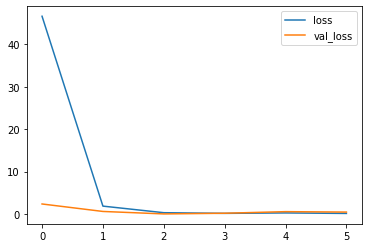

In [ ]:
loss[['loss','val_loss']].plot()

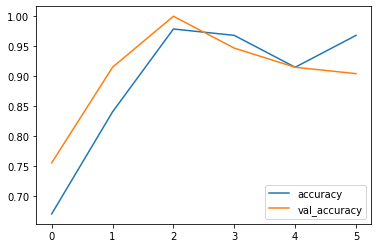

In [ ]:
loss[['accuracy','val_accuracy']].plot()

In [ ]:
val = i_g.flow_from_directory('/content/drive/MyDrive/dataset', target_size = (300,300),color_mode='grayscale',batch_size = 16, class_mode='binary',shuffle = False)
val.class_indices

Found 94 images belonging to 2 classes.


{'covid': 0, 'normal': 1}

In [ ]:
pred = []
for i in model.predict(val).reshape(1,-1)[0]:
    pred.append(np.round(i))

In [ ]:
print(classification_report(pred,val.classes))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        67
         1.0       1.00      0.93      0.96        27

    accuracy                           0.98        94
   macro avg       0.99      0.96      0.97        94
weighted avg       0.98      0.98      0.98        94



In [ ]:
import seaborn as sns

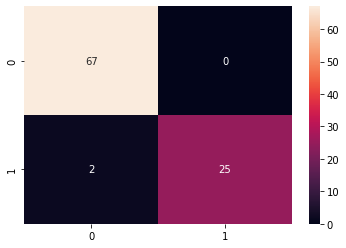

In [ ]:
sns.heatmap(confusion_matrix(pred,val.classes),annot=True)

In [ ]:
model.save('./covid.h5')